APM 598 Homework 3 - 3rd April 2023

Siddharth Jain 1226137070

Ketan Choudhary 1226082301

Pranav Chougule 1225934595

Q 1

In [21]:
import collections
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams
import math

# Part 1(a)
with open("data_HW3_Plato_Republic.txt", 'r') as file:
    corpus = file.read().lower()
tokenizer = RegexpTokenizer(r'\w+')
T = tokenizer.tokenize(corpus)

def ex1a():
    #Counts of words and unique words in corpus
    print("Total Words ", len(T))
    unique_word_count = len(set(T))
    print("Unique Words ", unique_word_count)

# Part 1(b)

def ex1b(min_length=8, top_words=5):
    # Prints top 5 highest frequency words with length of at least 8
    
    # Frequency table of all words of all lengths
    master_freq_table = collections.Counter(T)

    # Filter words by length and update the frequency table
    partial_freq_table = {}
    for word, count in master_freq_table.items():
        if len(word) >= min_length:
            partial_freq_table[word] = count

    # Pick top words
    sorted_partial_list = sorted(partial_freq_table.items(), key=lambda x: x[1], reverse=True)
    top_words_list = [word for word, _ in sorted_partial_list[:top_words]]

    print("Top", top_words, "words with at least", min_length, "letters:", top_words_list)


# Part 1(c)
# Create your unigrams, bigrams, unigram frequencies and bigram frequencies
unigrams = list(ngrams(T, 1))
unigram_freq = collections.Counter(unigrams)
bigrams = list(ngrams(T, 2))
bigram_freq = collections.Counter(bigrams)

def probability(x1, x2):
    # Bigram probability P(x2|x1) given x1 and x2
    numerator = bigram_freq.get((x1, x2), 0)
    denominator = unigram_freq.get((x1,), 0)
    if denominator == 0:
        print("Unigram does not exist")
        return None
    return numerator / denominator

def ex1c():
    # Get the probability of "is socrates" occurring together
    print("Probability of 'is socrates' occurring together:", probability("is", "socrates"))

# Part 1(d)

def ex1d():
    # Gets the perplexity of the bigram model
    log_prob_sum = 0
    for x1, x2 in zip(T, T[1:]):
        log_prob_sum += math.log(probability(x1, x2) or 1)
    perplexity = math.exp(-log_prob_sum / (len(T) - 1))
    print('Bigram model perplexity:', perplexity)


print("\nExercise 1.a - Count of total words and unique words")
print()
ex1a()

print("\nExercise 1.b - Top 5 words with length of atleast 8 characters")
print()
ex1b(min_length=8, top_words=5)

print("\nExercise 1.c - Probability of 'is socrates' together")
print()
ex1c()

print("\nExercise 1.d - Perplexity of bigram model")
print()
ex1d()


Exercise 1.a - Count of total words and unique words

Total Words  119161
Unique Words  7334

Exercise 1.b - Top 5 words with length of atleast 8 characters

Top 5 words with at least 8 letters: ['certainly', 'knowledge', 'injustice', 'therefore', 'question']

Exercise 1.c - Probability of 'is socrates' together

Probability of 'is socrates' occurring together: 0.00039761431411530816

Exercise 1.d - Perplexity of bigram model

Bigram model perplexity: 41.23224124291925


Q 2 A

In [22]:
import numpy as np

# Prepare variables
letters = ['h', 'e', 'l', 'l', 'o']

# One-hot encoding
embedding = {
    'h': np.array([[1], [0], [0], [0]]),
    'e': np.array([[0], [1], [0], [0]]),
    'l': np.array([[0], [0], [1], [0]]),
    'o': np.array([[0], [0], [0], [1]])
}

A = np.array([[1, -1, -0.5, 0.5], [1, 1, -0.5, -1]])
B = np.array([[1, 1], [0.5, 1], [-1, 0], [0, -0.5]])

# Deduce the characters
# Initialize H as a 2x1 zero matrix
H = np.zeros((2, 1))
print("Q 2A")
print()
# Iterate over the letters and their embeddings
for i, letter in enumerate(letters):
    # Update H using the given formula
    H = np.tanh(np.matmul(A, embedding[letter]) + np.matmul(np.eye(2), H))
    
    # Compute Y by multiplying B and H
    Y = np.matmul(B, H)
    
    # Find the letter in the embedding with the highest value in Y, and print it as the predicted letter
    predicted_letter = max(embedding.keys(), key=lambda x: Y[embedding[x].argmax()])
    print("y{}:".format(i), predicted_letter)

Q 2A

y0: h
y1: e
y2: l
y3: l
y4: o


Q 2B

In [23]:
# import required libraries
import torch
import torch.nn as nn

# set hyperparameters
learning_rate = 0.1
num_epochs = 20

# define target sequence (olleh in reverse order)
target_sequence = torch.LongTensor([3, 2, 2, 1, 0])

# define input sequence as one-hot encoded tensor (hello)
input_sequence = torch.Tensor([[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1]]])

# create dictionary to map target_sequence indices to corresponding characters
target_map = {0: 'h', 1: 'e', 2: 'l', 3: 'o'}

# define RNN class
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        # initialize RNN layer with input size of 4, hidden size of 5, and 1 layer
        self.rnn = nn.RNN(input_size=4, hidden_size=5, num_layers=1, batch_first=True)
        # initialize linear layer with 5 input neurons and 4 output neurons
        self.fc = nn.Linear(5, 4)

    def forward(self, x):
        # pass input tensor through RNN layer
        output, _ = self.rnn(x)
        # pass output tensor through linear layer
        output = self.fc(output)
        # return output tensor
        return output

# create instance of RNN class
rnn_model = RNN()

# define loss function
loss_function = nn.CrossEntropyLoss()

# create optimizer to update model parameters
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=learning_rate)

# begin training loop
for epoch in range(num_epochs):
    # zero out optimizer gradients
    optimizer.zero_grad()
    # pass input_sequence through RNN model
    outputs = rnn_model(input_sequence)
    # calculate loss between predicted outputs and target sequence
    loss = loss_function(outputs.squeeze(), target_sequence)
    # backpropagate loss
    loss.backward()
    # update model parameters
    optimizer.step()

    # get predicted indices by finding argmax of output tensor
    predicted_indices = outputs.argmax(dim=2).squeeze()
    # map predicted indices to corresponding characters using target_map
    predicted_sequence = [target_map[idx.item()] for idx in predicted_indices]
    # print predicted sequence
    print("Predicted string: ", ''.join(predicted_sequence))

# print learned weights of RNN and linear layers
print("\nLearning Finished!\n")
print(f"Learned RNN layer weights: {rnn_model.rnn.weight_hh_l0.data}")
print(f"Learned input layer weights: {rnn_model.rnn.weight_ih_l0.data}")
print(f"Learned output layer weights: {rnn_model.fc.weight.data}")

Predicted string:  lllll
Predicted string:  lllll
Predicted string:  llllh
Predicted string:  olllh
Predicted string:  olllh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh

Learning Finished!

Learned RNN layer weights: tensor([[-0.2236,  0.4660, -1.3218, -0.2162,  0.4035],
        [ 0.6656, -1.4090, -1.3391, -0.4641, -1.3211],
        [ 0.8505,  0.0977,  0.8362, -1.2959, -0.3206],
        [-0.0869, -0.3796,  1.1271,  0.6473, -0.4095],
        [-0.2337, -1.1305, -1.8440,  0.5506,  0.0122]])
Learned input layer weights: tensor([[-1.2754,  0.6338,  1.1080, -0.9225],
        [ 0.0718,  0.4998, -0.9141,  1.3280],
        [-1.4131, -1.6304,  0.5676,  1.6910],
        [

Q 3A - Solving

<img src='IMG_7043.jpg'>

Q 3 B and C

Perturbation       Difference


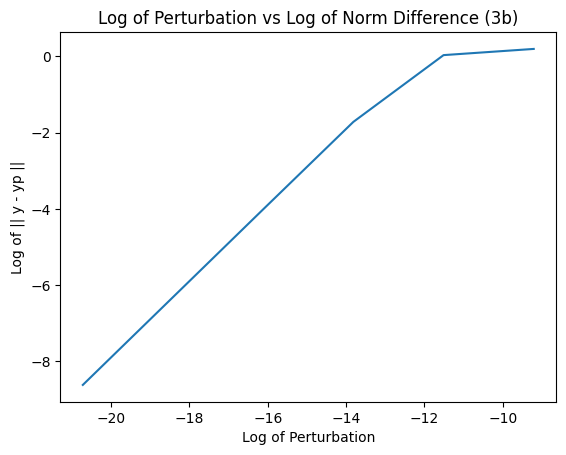

0.0001             1.212935848912779
1e-05             1.0311684445256606
1e-06             0.1790357751946389
1e-07             0.018076690898621735
1e-08             0.0018078445511996567
1e-09             0.00018078463060512123
Perturbation       Difference


C:\Users\siddh\AppData\Local\Temp\ipykernel_15832\1294253227.py:60: RuntimeWarning: divide by zero encountered in log
  plot(np.log(perturbations), np.log(y_diff), "3c")


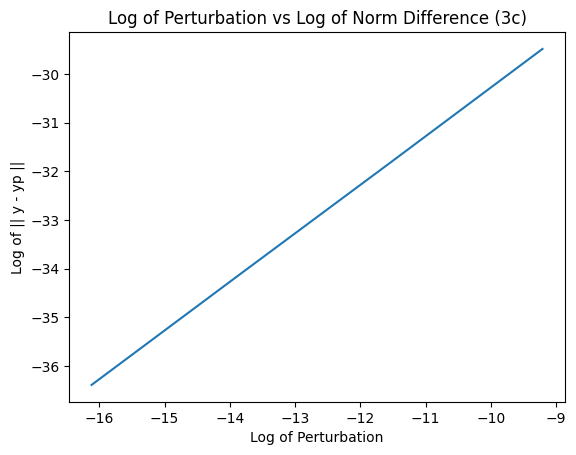

0.0001             1.5622419963903562e-13
1e-05             1.5543915340969376e-14
1e-06             1.5700924586837751e-15
1e-07             1.5700924586837752e-16
1e-08             0.0
1e-09             0.0


C:\Users\siddh\AppData\Local\Temp\ipykernel_15832\1294253227.py:67: RuntimeWarning: divide by zero encountered in log
  return np.log(perturbations), np.log(y_diff)


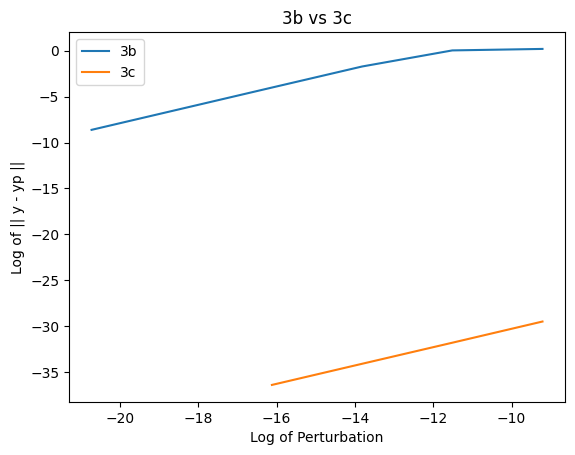

In [24]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

# Define perturbations and matrices
perturbations = np.float64(10) ** -np.arange(4, 10)
A = np.eye(2)
B = np.eye(2)
R = np.array([[0.5, -1], [-1, 0.5]])

# Calculate 2-norm difference between y and yp
def get_norm_diff(y, yp):
    diff = y - yp
    return LA.norm(diff, 2)

# Calculate y(t) for a given x and perturbation
def get_yt(x, perturbation):
    H = np.zeros((2, 1))
    
    # Update x with perturbation
    x += np.array([[perturbation], [-perturbation]])
        
    # Apply a series of operations to H
    H = np.tanh(np.matmul(R, H) + np.matmul(A, x))
    for i in range(1, 30):
        H = np.tanh(np.matmul(R, H))
    
    # Return the product of B and H
    return np.matmul(B, H)

# Plot log-perturbation vs log-norm-difference
def plot(perturbations, y_diff, plot_label):
    plt.plot(perturbations, y_diff)
    plt.xlabel("Log of Perturbation")
    plt.ylabel("Log of || y - yp ||")
    plt.title(f"Log of Perturbation vs Log of Norm Difference ({plot_label})")
    plt.show()

# Main function for exercise 3
def ex3(label):
    # Initialize an empty list to store the differences
    y_diff = []
    # Print a header for the table
    print("Perturbation       Difference")

    # If the label is "3b", compute the y-values for yt using get_yt with input [[0], [0]]
    # and append the norm difference to y_diff for each perturbation in the perturbations list
    if label == "3b":
        yt = get_yt(([[0], [0]]), 0)
        y_diff = [get_norm_diff(yt, get_yt([[0], [0]], perturbation)) for perturbation in perturbations]
        # Plot the log of perturbations against the log of y_diff and give the plot a title
        plot(np.log(perturbations), np.log(y_diff), "3b")

    # If the label is not "3b", compute the y-values for yt using get_yt with input [[2], [1]]
    # and append the norm difference to y_diff for each perturbation in the perturbations list
    else:
        yt = get_yt(([[2], [1]]), 0)
        y_diff = [get_norm_diff(yt, get_yt([[2], [1]], perturbation)) for perturbation in perturbations]
        # Plot the log of perturbations against the log of y_diff and give the plot a title
        plot(np.log(perturbations), np.log(y_diff), "3c")

    # Print the perturbation and corresponding difference for each perturbation in perturbations
    for perturbation, diff in zip(perturbations, y_diff):
        print(perturbation, "           ", diff)

    # Return the log of perturbations and log of y_diff as a tuple
    return np.log(perturbations), np.log(y_diff)

# Run ex3 for 3b and 3c
peturbations_b, diff_b = ex3("3b")
peturbations_c, diff_c = ex3("3c")

# Plot ex3 results for 3b and 3c
plt.plot(peturbations_b, diff_b, label="3b")
plt.plot(peturbations_c, diff_c, label="3c")
plt.legend()
plt.title("3b vs 3c")
plt.xlabel("Log of Perturbation")
plt.ylabel("Log of || y - yp ||")
plt.show()

RuntimeWarning: divide by zero encountered in log
Can be ignored

EXPLANATION

Measuring how sensitive a computer model is to changes in its inputs. To test this sensitivity, the model is given slightly different input values and the resulting output is compared to the original output. The L2 norm is used to measure the difference between these outputs. If the difference is large, it means the model is sensitive to changes in its inputs, and if the difference is small, it means the model is not very sensitive.

In 3b, the model is highly sensitive to changes in the input when the input values are (0,0), as even small changes cause a significant difference in the output. In 3c, the model is not very sensitive to changes in the input when the input values are (2,1) because of a function called tanh, which limits the sensitivity of the model to changes in input values.

Overall, how the model behaves when input values are changed slightly, and how the L2 norm can be used to measure the sensitivity of the model to these changes.

Q 3 Extra

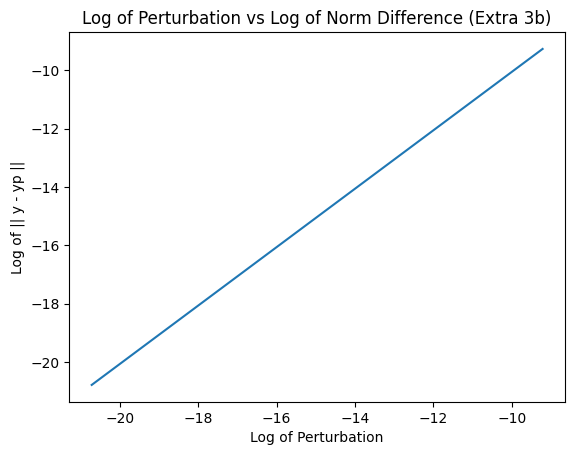

(array([ -9.21034037, -11.51292546, -13.81551056, -16.11809565,
        -18.42068074, -20.72326584]),
 array([[ -9.26923189],
        [-11.57181698],
        [-13.87440208],
        [-16.17698717],
        [-18.47957226],
        [-20.78215736]]))

In [25]:
# Calculate y(t) for a new perturbation
def new_yt(x, perturbation):
    # Initialize H as a 2x1 zero matrix
    H = np.zeros((2, 1))
    # Set the number of timesteps to 30
    timesteps = 30
    # Add the perturbation scaled by [1, 1] to x
    x += perturbation * np.array([[1], [1]])
    
    # Iterate over the timesteps, computing H using the given formula
    for i in range(timesteps):
        H = np.tanh(np.matmul(R, H) + np.matmul(A, x))
    
    # Return the product of B and H
    return np.matmul(B, H)

def ex_3extra():
    # Create an array of perturbed initial states
    x0_perturbed = np.array([[[p], [p]] for p in perturbations])
    
    # Calculate the predicted y values for each perturbed initial state
    y_perturbed = np.array([new_yt(x0, 0) for x0 in x0_perturbed])
    
    # Calculate the difference between the predicted y values and the original y value
    y_diff = np.linalg.norm(y_perturbed - new_yt([[0], [0]], 0), axis=1)
    
    # Plot the results
    plot(np.log(perturbations), np.log(y_diff), "Extra 3b")
    
    return np.log(perturbations), np.log(y_diff)

ex_3extra()